# **Diabetes classification**

## **Introduction**
Diabetes is a widespread chronic disease that requires early detection to prevent serious health complications. With the growth of healthcare data, machine learning offers effective tools for predicting and managing such conditions.

In this project, we use the **[Diabetes Clinical Dataset](https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows/data)** from Kaggle, which contains **100,000 records** with features like age, gender, BMI, blood glucose, HbA1c level, and other clinical factors. Our goal is to build a classification model that can distinguish between diabetic and non-diabetic individuals. This work highlights how data-driven approaches can support early diagnosis and improve healthcare decision-making.


## **Exploratory Data Analysis**

In [1]:

import pandas as pd
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

from utils.function import *
from utils.constants import *

import warnings
warnings.filterwarnings("ignore")

### **Overview the dataset**

In [2]:
df = pd.read_csv('data/diabetes_dataset_with_notes.csv')

In [3]:
df.shape

(100000, 17)

In [4]:
df.head(3)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."


In [5]:
df.tail(3)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0,"Obese category, increased risk for diabetes an..."
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0,"Overweight, advised dietary and exercise modif..."
99999,2016,Male,13.0,Wyoming,0,0,0,1,0,0,0,No Info,17.16,5.0,90,0,"Young patient, generally lower risk but needs ..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

This dataset contains 100,000 records and 17 columns capturing demographic, clinical, and health-related features that can influence diabetes risk.

**Features**
- `year`(*int64*): The year of record entry
- `gender`(*object*): Patient's gender
- `age` (*float64*): Age of the individual in years
- `location` (*object*): Geographical location of the patient
- `race:AfricanAmerican`, `race:Asian`, `race:Caucasian`, `race:Hispanic`, `race:Other` (*int64*): This is the race of the patient (already one-hot encoded)
- `hypertension` (*int64*): Presence of high blood pressure (1 = Yes, 0 = No)
- `heart_disease` (*int64*): Presence of heart disease (1 = Yes, 0 = No)
- `smoking_history` (*object*): Smoking status (e.g. never, former, current, etc.)
- `bmi` (*float64*): Body Mass Index, a measure of body fat based on height and weight.
- `hbA1c_level` (*float64*): Hemoglobin A1C level, showing average blood sugar over the past 2-3 months.
- `blood_glucose_level` (*int64*): Blood glucose concentration (measured at a single point in time).
- `clinical_notes` (*object*): Text field with additional clinical observations or notes.

**Target Variable**
- `diabetes` (*int64*): (1 = Diabetic, 0 = Non-diabetic) 

### **Explore columns**

#### **Year**

This data collected diabetes information from 2015 - 2022

In [7]:
years = df['year'].value_counts().sort_index()
years

year
2015     8760
2016     8760
2018     2678
2019    79745
2020       42
2021        7
2022        8
Name: count, dtype: int64

We can see that this dataset peaks dramatically in 2019, with a count of 79,731, which covers approximately 80% of the data. However, I believe this feature can be removed from the dataset, since we only need information from the healthy records and want to disregard technological developments over the years.

#### **Gender**

This data include 3 genders: "Male", "Female", and "Other"

In [8]:
genders = df["gender"].value_counts()
genders

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

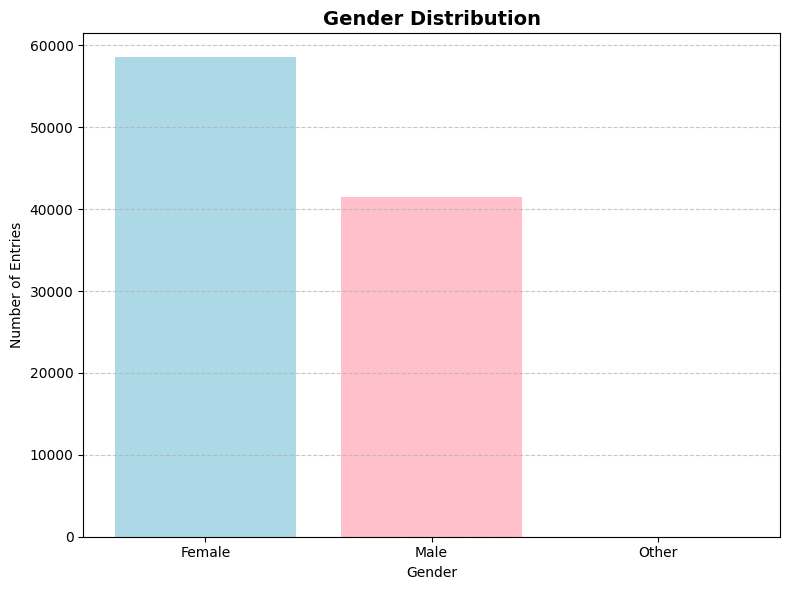

In [9]:
plt.figure(figsize=(8,6))
plt.bar(genders.index, genders.values,color=['#ADD8E6', 'pink', '#CBAACB'])
plt.title("Gender Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the chart, we observe that the dataset is imbalanced across the three gender categories: the number of "Female" samples is slightly higher than "Male", while both are significantly larger than "Other". To maintain a consistent distribution between the training and test sets, it is advisable to remove the "Other" category due to its very small representation.

Additionally, since machine learning models typically perform better with numerical inputs, we should convert the categorical gender values into numeric form. A common approach is to apply One-Hot Encoding, which transforms each category into a separate binary feature.

#### **Age**

In [10]:
ages = df["age"].value_counts()
ages

age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

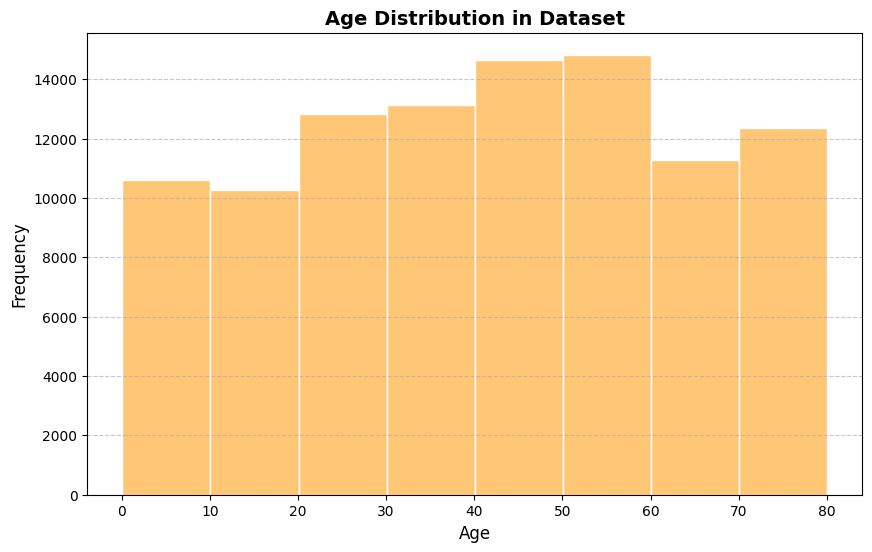

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(
    df["age"], 
    bins=8, 
    kde=False, 
    color="#FFB347",
    edgecolor="white",
)

plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Age Distribution in Dataset", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The histogram shows that the dataset has a relatively balanced distribution across different age groups. Most age ranges between 20 and 60 years old are well represented, with peaks around the 40–50 and 50–60 groups. The younger population (below 20) and the older population (above 70) have fewer samples compared to the middle-aged groups, but they are still significantly present. Overall, the distribution indicates that the dataset covers a broad spectrum of ages, with the majority concentrated in the working-age population.

#### **Race**

In [12]:
race = df[['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic','race:Other']]

In [13]:
zeros = (race==0).sum()
ones = (race==1).sum()
race_counts = pd.DataFrame({'zero':zeros,'one':ones})
race_counts.index = [
    "African American", 
    "Asian", 
    "Caucasian", 
    "Hispanic", 
    "Other"
]
race_counts

,zero,one
African American,79777,20223
Asian,79985,20015
Caucasian,80124,19876
Hispanic,80112,19888
Other,80002,19998


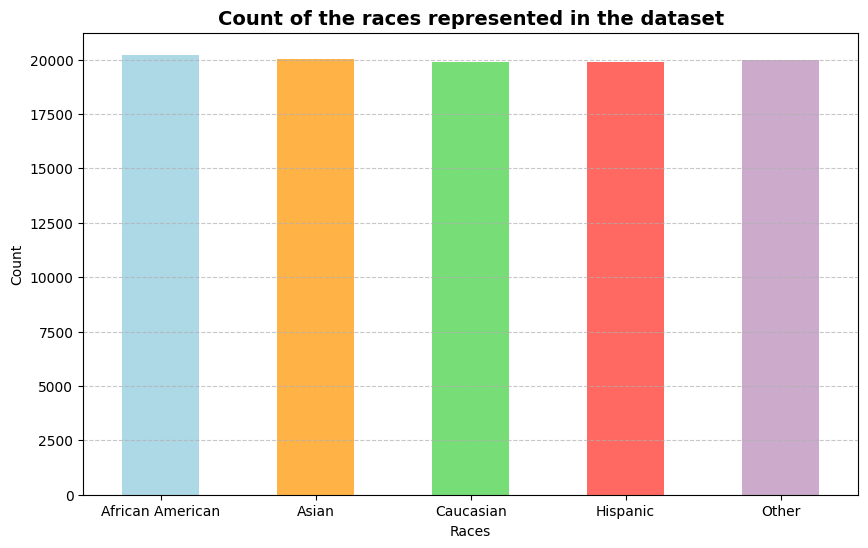

In [14]:
plt.figure(figsize=(10,6))
race_counts['one'].plot(kind='bar',color=['#ADD8E6', '#FFB347', '#77DD77', '#FF6961', '#CBAACB'])
plt.title('Count of the races represented in the dataset', fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=10)
plt.xlabel('Races')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

The distribution is quite balanced across all groups, with African American, Asian, Caucasian, Hispanic, and Other categories each having close to 20,000 records.

#### **Location**

In [15]:
locations = df["location"].value_counts()
locations

location
Kentucky                2038
Iowa                    2038
Hawaii                  2038
Nebraska                2038
Florida                 2037
Minnesota               2037
Arkansas                2037
New Jersey              2037
Massachusetts           2036
Kansas                  2036
Louisiana               2036
District of Columbia    2036
Maine                   2036
Delaware                2036
Georgia                 2036
Michigan                2036
Illinois                2036
Pennsylvania            2036
Oregon                  2036
Alabama                 2036
Connecticut             2035
Maryland                2035
Alaska                  2035
North Dakota            2035
New York                2035
North Carolina          2035
Mississippi             2035
Rhode Island            2035
Colorado                2035
Missouri                2035
New Hampshire           2035
New Mexico              2033
South Dakota            2033
Montana                 2033
Idaho

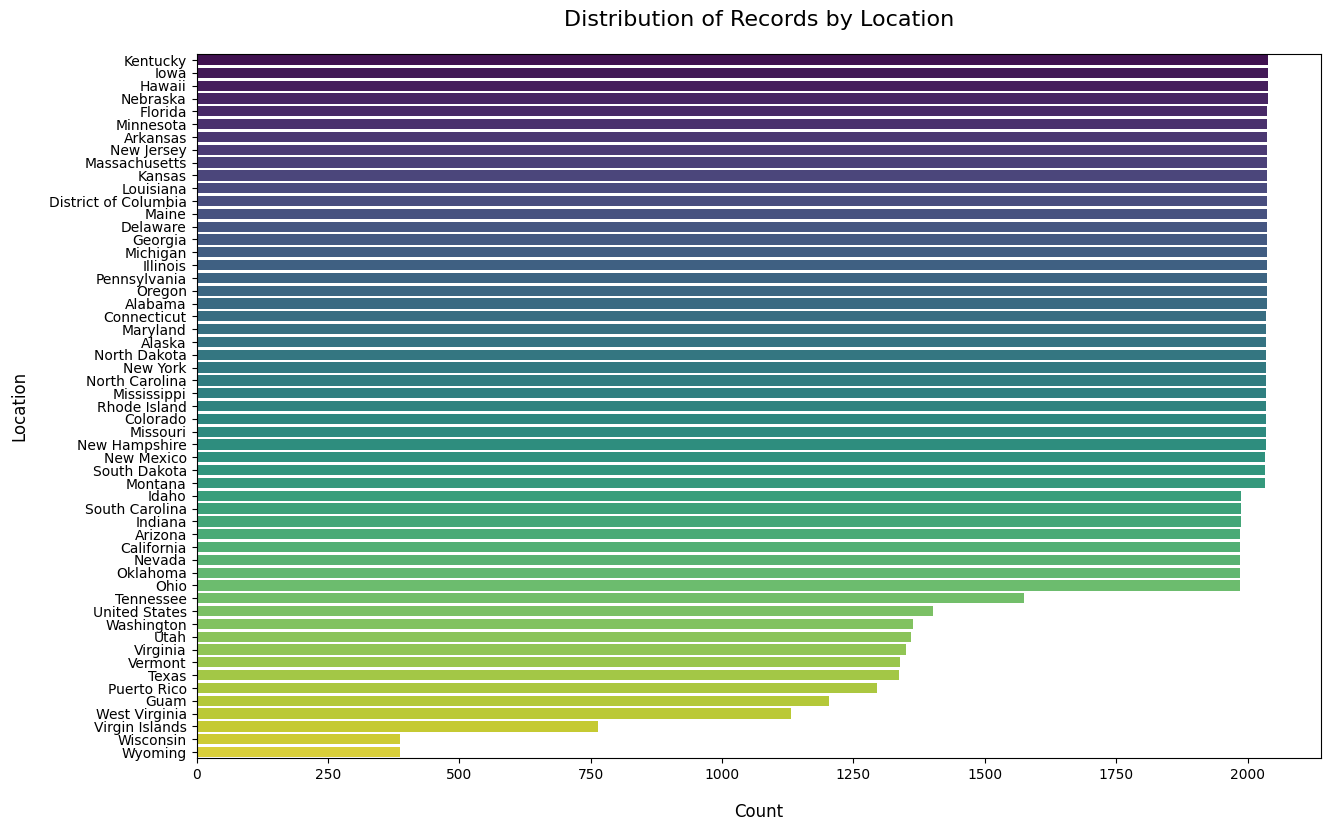

In [16]:
plt.figure(figsize=(12,7))
sns.countplot(
    y="location", 
    data=df, 
    order=df['location'].value_counts().index, 
    palette="viridis"
)

plt.title("Distribution of Records by Location", fontsize=16, pad=20)
plt.xlabel("Count", fontsize=12, labelpad=15)
plt.ylabel("Location", fontsize=12, labelpad=15)

plt.tight_layout(pad=-4)
plt.show()


Virgin Islands, Wisconsin and Wyoming have lesser entires as compared to other locations. We can combine these to one location named "Others".

#### **Hypertension**

In [17]:
hypertension = df["hypertension"].value_counts()
hypertension.index=['No Hypertension', 'Have Hypertension']
hypertension

No Hypertension      92515
Have Hypertension     7485
Name: count, dtype: int64

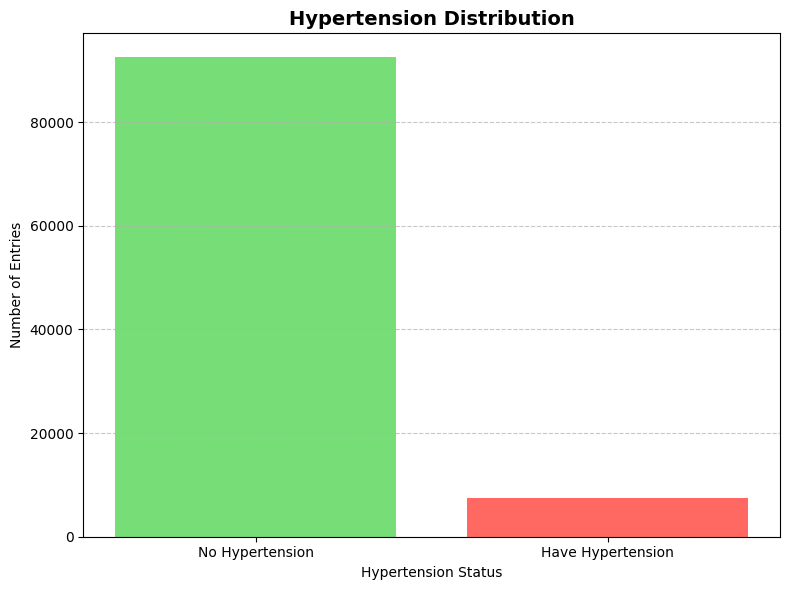

In [18]:
plt.figure(figsize=(8,6))
plt.bar(hypertension.index, hypertension.values,color=['#77DD77', '#FF6961'])
plt.title("Hypertension Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Hypertension Status")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see that, most of the people do not have hypertension.

#### **Heart Disease**

In [19]:
heart_disease = df['heart_disease'].value_counts()
heart_disease.index=['No Heart Disease', 'Have Heart Disease']
heart_disease

No Heart Disease      96058
Have Heart Disease     3942
Name: count, dtype: int64

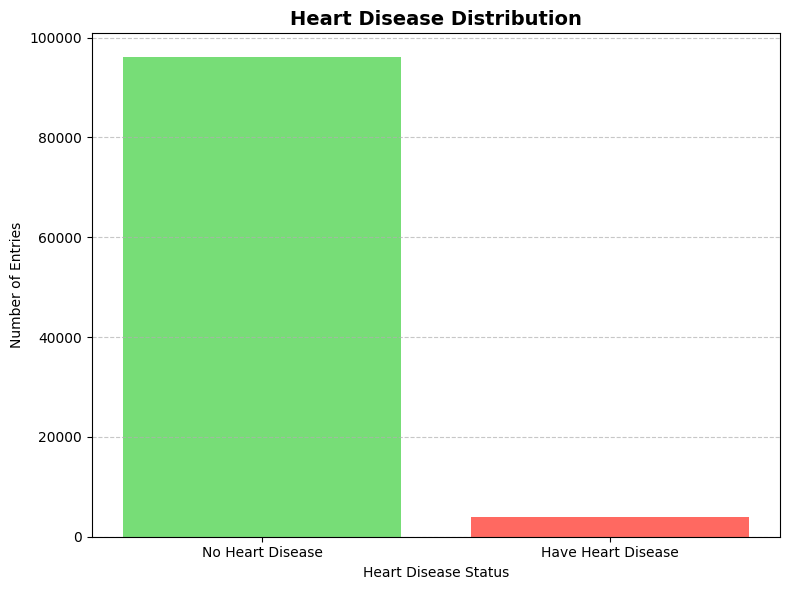

In [20]:
plt.figure(figsize=(8,6))
plt.bar(heart_disease.index, heart_disease.values,color=['#77DD77', '#FF6961'])
plt.title("Heart Disease Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Heart Disease Status")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see that, most of the people do not have heart disease.

#### **Smoking History**

In [21]:
smoke = df['smoking_history'].value_counts()
smoke

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

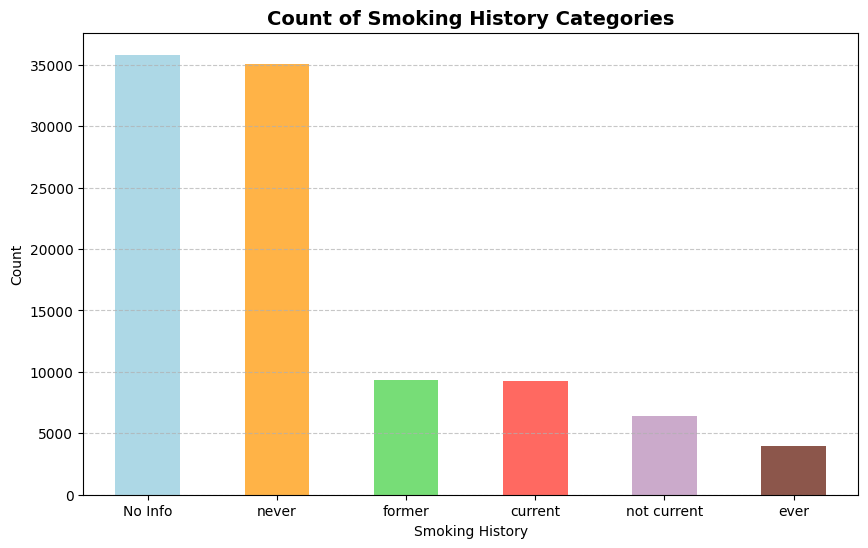

In [22]:
plt.figure(figsize=(10,6))
smoke.plot(kind='bar',color=['#ADD8E6', '#FFB347', '#77DD77', '#FF6961', '#CBAACB', '#8c564b'])
plt.title('Count of Smoking History Categories', fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=10)
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In this feature, the “No Info” category has the highest count (over 35,000). This indicates a large portion of missing information regarding individuals’ smoking history. Since such a high level of missing data can reduce the reliability and usefulness of this feature, it would be reasonable to remove it from further analysis.

#### **BMI**

In [23]:
bmi = df["bmi"].value_counts()
bmi

bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
50.73        1
52.25        1
64.80        1
64.27        1
64.26        1
Name: count, Length: 4247, dtype: int64

In [24]:
adults = df[df['age'] >= 20] 
children = df[df['age'] < 20]

For adults, BMI is interpreted the same way for men and women of all ages. The categories are:
- Underweight: BMI < 18.5   
- Normal weight: 18.5 ≤ BMI < 24.9
- Overweight: 25.0 ≤ BMI < 29.9
- Obesity (Class I): 30.0 ≤ BMI < 34.9
- Obesity (Class II): 35.0 ≤ BMI < 39.9
- Obesity (Class III / Severe): BMI ≥ 40.0

In [25]:
underweight_adult = adults[adults['bmi'] < 18.5].bmi.count()
normal_adult = adults[(adults['bmi'] >= 18.5) & (adults['bmi'] < 25)].bmi.count()
overweight_adult = adults[(adults['bmi'] >= 25) & (adults['bmi'] < 30)].bmi.count()
obese_adult = adults[adults['bmi'] >=30].bmi.count()

In [26]:
print("Underweight: ",underweight_adult)
print("Normal weight: ",normal_adult)
print("Overweight: ",overweight_adult)
print("Obese: ",obese_adult)

Underweight:  931
Normal weight:  16351
Overweight:  40536
Obese:  22514


In [27]:
class1_Obese = adults[(adults['bmi'] >= 30) & (adults['bmi'] < 35)].bmi.count()
class2_Obese = adults[(adults['bmi'] >= 35) & (adults['bmi'] < 40)].bmi.count()
class3_Obese = adults[adults['bmi'] >= 40].bmi.count()
print('Class1 Obese count: ',class1_Obese)
print('Class2 Obese count: ',class2_Obese)
print('Class3 Obese count: ',class3_Obese)

Class1 Obese count:  12134
Class2 Obese count:  5909
Class3 Obese count:  4471


For children and adolescents, BMI is age- and sex-specific and is expressed as a percentile based on growth charts (CDC or WHO).
- Underweight: BMI < 5th percentile
- Normal weight: 5th percentile ≤ BMI < 85th percentile
- Overweight: 85th percentile ≤ BMI < 95th percentile
- Obesity: BMI ≥ 95th percentile

In [28]:
children.loc[:, 'age_scaled'] = (
    children['age'].apply(lambda x: years_to_years_months(x) if pd.notna(x) else pd.NA)
)

In [29]:
children_merged = children.merge(
    bmi_percentile, how="left", on=["age_scaled", "gender"], validate="m:1"
)

In [30]:
underweight_children = children_merged[children_merged['bmi'] < children_merged["p5"]].bmi.count()
normal_children = children_merged[(children_merged['bmi'] >= children_merged["p5"]) & (children_merged['bmi'] < children_merged["p85"])].bmi.count()
overweight_children = children_merged[(children_merged['bmi'] >= children_merged["p85"]) & (children_merged['bmi'] < children_merged["p95"])].bmi.count()
obese_children = children_merged[children_merged['bmi'] >= children_merged["p95"]].bmi.count()

In [31]:
print("Underweight: ",underweight_children)
print("Normal weight: ",normal_children)
print("Overweight: ",overweight_children)
print("Obese: ",obese_children)

Underweight:  600
Normal weight:  8518
Overweight:  2983
Obese:  7560


In [32]:
underweight = underweight_children + underweight_adult
normal = normal_children + normal_adult
overweight = overweight_children + overweight_adult
obese = obese_children + obese_adult

In [33]:
bmi_categories = pd.Series([underweight, normal, overweight, obese], index=["Underweight","Normal", "Overweight", "Obese"])

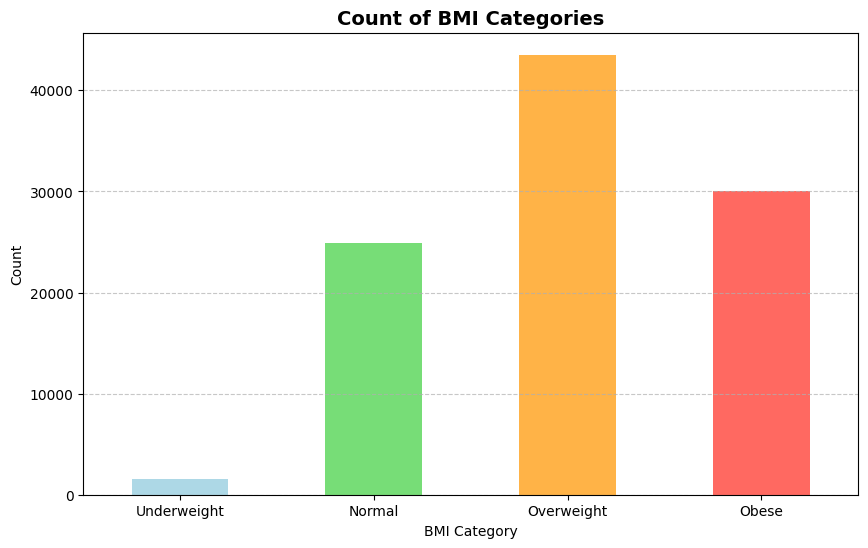

In [34]:
plt.figure(figsize=(10,6))
bmi_categories.plot(kind='bar',color=['#ADD8E6', '#77DD77', '#FFB347', '#FF6961'])
plt.title('Count of BMI Categories', fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=10)
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)   

We will explore two different ways of using the BMI feature:

1. Raw values – Use the original continuous BMI values directly as a numeric feature.

2. Categorical labels – Convert BMI values into four categories:

    - Underweight

    - Normal weight

    - Overweight

    - Obese

Then apply One-Hot Encoding to transform these categories into numerical features.

Both approaches will be compared to evaluate which representation of BMI leads to better model performance

#### **HbA1c_level**

An A1C test measures the percentage of your red blood cells that have glucose-coated hemoglobin. High A1C levels are a sign of high blood glucose from diabetes. Diabetes can cause serious health problems, including heart disease, kidney disease, and nerve damage. 

![A1C](hba1c.jpg)

In [35]:
normal = df[df['hbA1c_level'] < 5.7].hbA1c_level.count()
caution = df[(df['hbA1c_level']>=5.7) & (df['hbA1c_level'] <=6.4)].hbA1c_level.count()
danger = df[df['hbA1c_level'] >= 6.5].hbA1c_level.count()
print("Normal : ",normal)
print("Caution : ",caution)
print("Danger : ",danger)

Normal :  37857
Caution :  41346
Danger :  20797


In [36]:
HbA1c = pd.Series([normal, caution, danger], index=["Normal","Caution", "Danger" ])
HbA1c

Normal     37857
Caution    41346
Danger     20797
dtype: int64

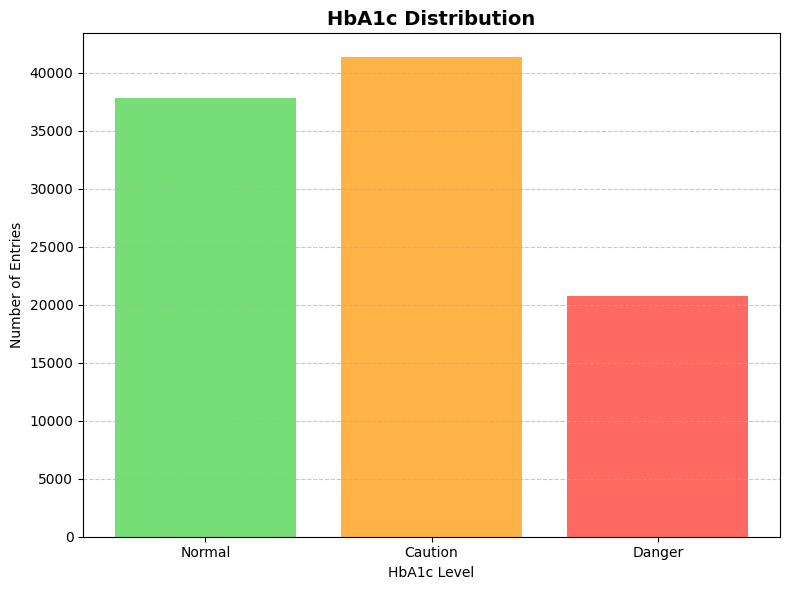

In [37]:
plt.figure(figsize=(8,6))
plt.bar(HbA1c.index, HbA1c.values,color=['#77DD77', '#FFB347', '#FF6961'])
plt.title("HbA1c Distribution", fontsize=14, fontweight="bold")
plt.xlabel("HbA1c Level")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on the definition of the A1C test and our preprocessing of the data, we observe that a large portion of individuals fall into the prediabetic range. However, to gain deeper insights, we will further investigate the relationship between HbA1c levels and the actual classification of diabetes. In particular, we will examine whether individuals with an HbA1c value greater than 6.4% are consistently categorized as diabetic in the dataset.

#### **Blood glucose level**

In [38]:
bgl = df["blood_glucose_level"].value_counts()
bgl

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

In [39]:
normal = df[(df['blood_glucose_level'] >= 80) & (df['blood_glucose_level'] <= 140)].blood_glucose_level.count()
prediabetic = df[(df['blood_glucose_level'] > 140 ) & (df['blood_glucose_level'] < 200)].blood_glucose_level.count()
diabetic = df[df['blood_glucose_level'] >= 200].blood_glucose_level.count()

print("Normal: ", normal)
print("Prediabetic: ", prediabetic)
print("Diabetic : ", diabetic)

Normal:  51372
Prediabetic:  37751
Diabetic :  10877


In [40]:
blood_glucose = pd.Series([normal,prediabetic,diabetic], index=["Normal", "Prediabetic", "Diabetic"])
blood_glucose

Normal         51372
Prediabetic    37751
Diabetic       10877
dtype: int64

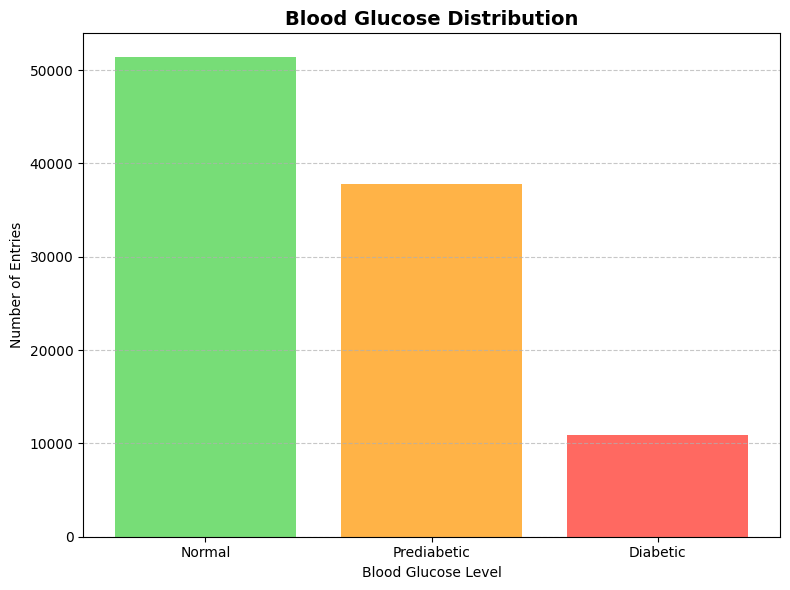

In [41]:
plt.figure(figsize=(8,6))
plt.bar(blood_glucose.index, blood_glucose.values,color=['#77DD77', '#FFB347', '#FF6961'])
plt.title("Blood Glucose Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on the definition of blood glucose thresholds and our preprocessing of the data, we observe that a large portion of individuals fall into the prediabetic range. However, to gain deeper insights, we will further investigate the relationship between blood glucose levels and the actual classification of diabetes. In particular, we will examine whether individuals with a blood glucose level greater than 200 mg/dL are consistently categorized as diabetic in the dataset.

#### **Diabetes**

In [42]:
diabetes = df["diabetes"].value_counts()
diabetes.index = ["Non-Diabetic", "Diabetic"]
diabetes

Non-Diabetic    91500
Diabetic         8500
Name: count, dtype: int64

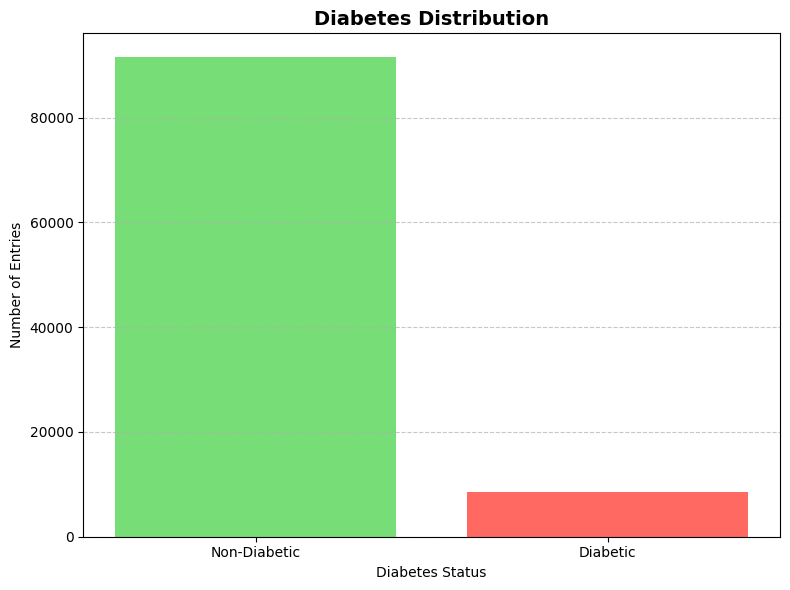

In [43]:
plt.figure(figsize=(8,6))
plt.bar(diabetes.index, diabetes.values,color=['#77DD77', '#FF6961'])
plt.title("Diabetes Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Diabetes Status")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We observe that the data is imbalanced between the two classes, Non-Diabetic and Diabetic. To address this and ensure that both classes are proportionally represented in the training and test sets, we will apply a stratified splitting strategy.

## **Preprocessing data**

After doing EDA process, we have to pre-process dataset like below:
- Check missing values
- Check duplicated values
- Remove 'Other' from `gender` columns
- Remove feature `year`, `smoking_history`, `clinical_notes`
- Check some columns with `object` type, whether the values in this columns have different form but have the same meanings (e.g. HCM city - Saigon City)
- Combine some values
- Add BMI class to the dataset

### **Check missing values**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

Based on the information above, this dataset has no missing values.

### **Check duplicated values**

In [45]:
duplicated = df.duplicated().sum()
print(f'Number of Duplicated values: {duplicated}')

Number of Duplicated values: 14


In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.reset_index(drop=True, inplace=True)

In [48]:
df.shape

(99986, 17)

In [49]:
duplicated = df.duplicated().sum()
print(f'Number of Duplicated values: {duplicated}')

Number of Duplicated values: 0


### **Remove "Other" from `gender` feature**

In [50]:
df = df[df["gender"] != "Other"]
df.shape

(99968, 17)

### **Remove feature `year`, `smoking_history`, `clinical_notes`**

In [51]:
df = df.drop(columns=['year', 'smoking_history', 'clinical_notes']).reset_index(drop=True)
df.shape

(99968, 14)

### **Check some columns with `object` type**

We will check `location` feature

In [52]:
df["location"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'United States', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

The `location` columns seem correct, do not have the different categories with the same meaning!!! But in the EDA process, we can see Virgin Islands, Wisconsin and Wyoming have lesser entires as compared to other locations, so we can combine these to one location named "Others".

### **Combine some values**

In [53]:
mapping = {
    "Virgin Islands": "Others",
    "Wisconsin": "Others",
    "Wyoming": "Others",
}

df['location'] = df['location'].replace(mapping)

In [54]:
df['location'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'United States', 'Utah',
       'Vermont', 'Others', 'Virginia', 'Washington', 'West Virginia'],
      dtype=object)

### **Add BMI class to the dataset**

Convert BMI values into four categories (Underweight, Normal, Overweight, Obese)

In [55]:
df.loc[:, 'age_scaled'] = (
    df['age'].apply(lambda x: years_to_years_months(x) if pd.notna(x) else pd.NA)
)

In [56]:
df["bmi_class"] = df.apply(
    lambda row: classify_bmi_row(row, bmi_percentile), axis=1
)

In [57]:
df.head()

,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,age_scaled,bmi_class
0,Female,32.0,Alabama,0,0,0,0,1,0,0,27.32,5.0,100,0,32-0,Overweight
1,Female,29.0,Alabama,0,1,0,0,0,0,0,19.95,5.0,90,0,29-0,Normal weight
2,Male,18.0,Alabama,0,0,0,0,1,0,0,23.76,4.8,160,0,18-0,Normal weight
3,Male,41.0,Alabama,0,0,1,0,0,0,0,27.32,4.0,159,0,41-0,Overweight
4,Female,52.0,Alabama,1,0,0,0,0,0,0,23.75,6.5,90,0,52-0,Normal weight


In [58]:
df = df.drop(columns=["age_scaled"]).reset_index(drop=True)
df.shape

(99968, 15)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99968 entries, 0 to 99967
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                99968 non-null  object 
 1   age                   99968 non-null  float64
 2   location              99968 non-null  object 
 3   race:AfricanAmerican  99968 non-null  int64  
 4   race:Asian            99968 non-null  int64  
 5   race:Caucasian        99968 non-null  int64  
 6   race:Hispanic         99968 non-null  int64  
 7   race:Other            99968 non-null  int64  
 8   hypertension          99968 non-null  int64  
 9   heart_disease         99968 non-null  int64  
 10  bmi                   99968 non-null  float64
 11  hbA1c_level           99968 non-null  float64
 12  blood_glucose_level   99968 non-null  int64  
 13  diabetes              99968 non-null  int64  
 14  bmi_class             99968 non-null  object 
dtypes: float64(3), int6

## **Feature Engineering**

In [60]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### **Apply `StandardScaler`**
We will apply `StandardScaler` to some numerical columns.

In [61]:
scaler = StandardScaler()

In [62]:
df[["age", "bmi", "hbA1c_level", "blood_glucose_level"]] = scaler.fit_transform(df[["age", "bmi", "hbA1c_level", "blood_glucose_level"]])

In [63]:
df.head()

,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,bmi_class
0,Female,-0.439148,Alabama,0,0,0,0,1,0,0,-0.000114,-0.492723,-0.934892,0,Overweight
1,Female,-0.572383,Alabama,0,1,0,0,0,0,0,-1.110508,-0.492723,-1.180533,0,Normal weight
2,Male,-1.060910,Alabama,0,0,0,0,1,0,0,-0.536478,-0.679523,0.538955,0,Normal weight
3,Male,-0.039444,Alabama,0,0,1,0,0,0,0,-0.000114,-1.426725,0.514390,0,Overweight
4,Female,0.449083,Alabama,1,0,0,0,0,0,0,-0.537985,0.908281,-1.180533,0,Normal weight


### **Apply `OneHotEncoder`**
We will apply `OneHotEncoder` for some columns.

In [64]:
categorical_cols = ["gender", "location", "bmi_class"]

In [65]:
encoder = OneHotEncoder(sparse_output=False, drop=None)

In [66]:
encoded = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)
encoded_df = encoded_df.astype(int)

In [67]:
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

In [68]:
df_encoded.shape

(99968, 71)

## **Models**

### **Prepare train, test data**

I already store train, test split using the Stratified strategies in 2 files `train_data.csv` and `test_data.csv`

In [69]:
train_df = pd.read_csv('data/train_data.csv')
test_df = pd.read_csv('data/test_data.csv')

In [70]:
X_train = train_df.drop(columns=['diabetes'])
y_train = train_df['diabetes']
X_test = test_df.drop(columns=['diabetes'])
y_test = test_df['diabetes']

### **Logistic Regression**

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [72]:
# finetuned_model = LogisticRegression(random_state=42)

In [73]:
# params_grid = {
#     "penalty": ["l1", "l2", "elasticnet", None],
#     'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#     'class_weight': [None, 'balanced'],
#     'max_iter': [100, 200, 500, 1000],
#     "l1_ratio": [None, 0, 0.5, 1],
# }

# grid = GridSearchCV(finetuned_model, params_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
# grid.fit(X_train, y_train)

In [74]:
# print("Best parameters:", grid.best_params_)
# print("Best CV score:", grid.best_score_)

We found the best params is `{'C': 0.01, 'class_weight': None, 'l1_ratio': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}`

In [75]:
best_lr_model = LogisticRegression(
    C=0.01,
    class_weight=None,
    l1_ratio=None,
    max_iter=100,
    penalty="l1",
    solver='liblinear',
    random_state=42,
)

In [76]:
best_lr_model.fit(X_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [77]:
best_lr_y_pred = best_lr_model.predict(X_test)

Accuracy:  0.960888266479944
Recall:  0.6188235294117647
Precision:  0.8870151770657673
F1 Score:  0.729036729036729


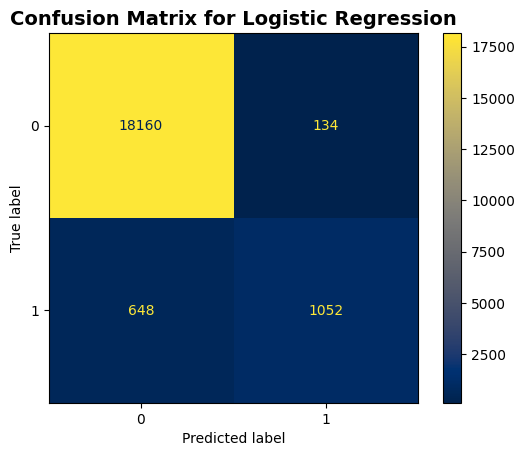

In [78]:
print("Accuracy: ", accuracy_score(y_test, best_lr_y_pred))
print("Recall: ", recall_score(y_test, best_lr_y_pred))
print("Precision: ", precision_score(y_test, best_lr_y_pred))
print("F1 Score: ", f1_score(y_test, best_lr_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, best_lr_y_pred)).plot(cmap=plt.cm.cividis)

plt.title("Confusion Matrix for Logistic Regression", fontsize=14, weight='bold')
plt.show()

- The **Logistic Regression** model performs reasonably well in identifying non-diabetic cases, with 18,160 true negatives and only 134 false positives. 
- However, it struggles to correctly classify diabetic patients, capturing only 1,052 true positives while missing 648 cases. This shows that while the model is reliable at ruling out non-diabetes, it sacrifices recall for diabetes detection.

In [79]:
lr_importance = best_lr_model.coef_[0]
lr_importance = np.abs(lr_importance / lr_importance.sum())

In [80]:
lr_indices = np.argsort(np.abs(lr_importance))[::-1]
lr_indices

array([ 9, 10,  0,  8,  6,  7, 11, 68, 64, 67, 69, 65, 66, 63, 55, 62, 61,
       60, 59, 58, 57, 56, 47, 46, 45, 44, 43, 42, 41, 40, 39, 54, 53, 52,
       51, 50, 49, 48, 32, 33, 34, 35, 36, 37, 38, 31, 23, 30, 29, 28, 27,
       26, 25, 24, 16, 17, 18, 19, 20, 21, 22, 12, 15, 14, 13,  5,  4,  3,
        2,  1])

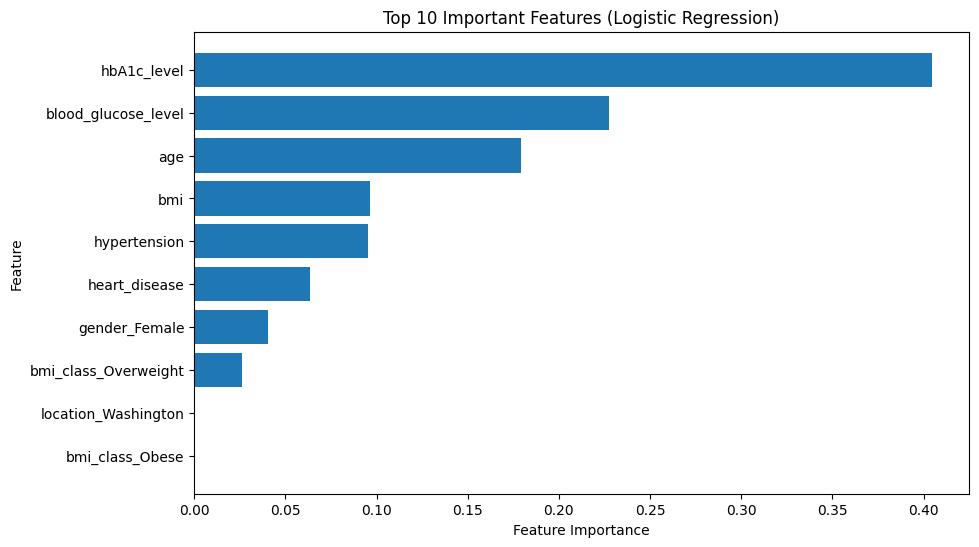

In [81]:
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[lr_indices][:10], lr_importance[lr_indices][:10])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()

### **Support Vector Machine**

In [82]:
from sklearn.svm import SVC

In [83]:
# finetuned_model = SVC(random_state=42)

In [84]:
# params_grid = {
#     'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#     'kernel': ['rbf'],
#     'gamma': ['scale', 'auto'],
#     'class_weight': [None, 'balanced'],
#     'shrinking': [False, True]
# }

# grid = GridSearchCV(finetuned_model, params_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
# grid.fit(X_train, y_train)

In [85]:
# print("Best parameters:", grid.best_params_)
# print("Best CV score:", grid.best_score_)

We found the best params is `{'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': False}`

In [86]:
best_svm_model = SVC(
    C=10,
    class_weight=None,
    gamma="scale",
    kernel="rbf",
    shrinking=False,
    random_state=42,
)

In [87]:
best_svm_model.fit(X_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,False
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [88]:
best_svm_y_pred = best_svm_model.predict(X_test)

Accuracy:  0.9689906972091628
Recall:  0.6547058823529411
Precision:  0.9712041884816754
F1 Score:  0.7821503865073788


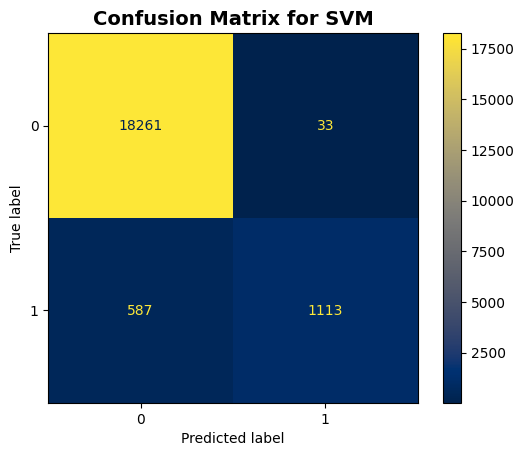

In [89]:
print("Accuracy: ", accuracy_score(y_test, best_svm_y_pred))
print("Recall: ", recall_score(y_test, best_svm_y_pred))
print("Precision: ", precision_score(y_test, best_svm_y_pred))
print("F1 Score: ", f1_score(y_test, best_svm_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, best_svm_y_pred)).plot(cmap=plt.cm.cividis)

plt.title("Confusion Matrix for SVM", fontsize=14, weight='bold')
plt.show()

- The **SVM** model improves upon Logistic Regression by reducing both false positives and false negatives. 
- It achieves 18,261 true negatives and 1,113 true positives, with only 33 false positives and 587 false negatives. This indicates that SVM is better balanced and more robust, with stronger performance in detecting diabetic patients while still maintaining high accuracy for non-diabetic cases.

### **Decision Tree**

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
# finetuned_model = DecisionTreeClassifier(random_state=42)

In [92]:
# params_grid = {
#     "criterion": ["gini"],
#     "splitter": ["best", "random"],
#     "max_depth": [None, 5, 8, 12, 16, 20],
#     "min_samples_split": [2, 5, 10, 20],
#     "min_samples_leaf": [2, 5, 10, 20],
#     "max_features": [None, "sqrt", "log2"],   
#     "max_leaf_nodes": [None, 20, 50, 100, 200],
#     "class_weight": [None, "balanced"],
# }

# grid = GridSearchCV(finetuned_model, params_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
# grid.fit(X_train, y_train)

In [93]:
# print("Best parameters:", grid.best_params_)
# print("Best CV score:", grid.best_score_)

We found the best prams is `{'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}`

In [94]:
best_dt_model = DecisionTreeClassifier(
    class_weight=None,
    criterion="gini",
    max_depth=8,
    max_features=None,
    max_leaf_nodes=20,
    min_samples_leaf=2,
    min_samples_split=2,
    splitter="best",
    random_state=42,
)

In [95]:
best_dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,20
,min_impurity_decrease,0.0
,class_weight,None


In [96]:
best_dt_y_pred = best_dt_model.predict(X_test)

Accuracy:  0.9722416725017505
Recall:  0.6735294117647059
Precision:  1.0
F1 Score:  0.804920913884007


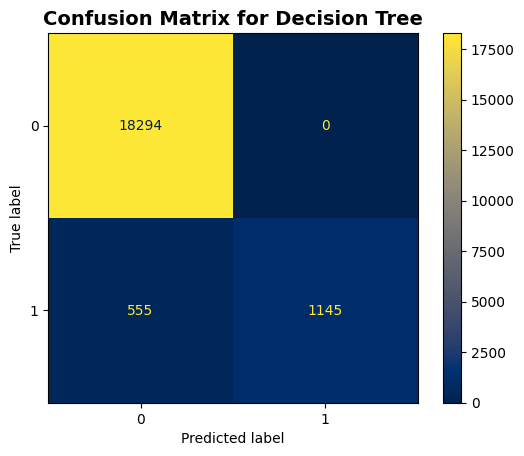

In [97]:
print("Accuracy: ", accuracy_score(y_test, best_dt_y_pred))
print("Recall: ", recall_score(y_test, best_dt_y_pred))
print("Precision: ", precision_score(y_test, best_dt_y_pred))
print("F1 Score: ", f1_score(y_test, best_dt_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, best_dt_y_pred)).plot(cmap=plt.cm.cividis)

plt.title("Confusion Matrix for Decision Tree", fontsize=14, weight='bold')
plt.show()

- The **Decision Tree** model shows excellent specificity, correctly classifying all non-diabetic cases with 18,294 true negatives and zero false positives. 
- It also identifies 1,145 diabetic cases, but it still misses 555 cases. While the model is very reliable in predicting non-diabetics, its recall for detecting diabetic patients remains slightly lower compared to Random Forest.

In [98]:
dt_importances = best_dt_model.feature_importances_

In [99]:
indices = dt_importances.argsort()[::-1]
indices

array([ 9, 10,  8,  0,  7,  6, 12, 65, 64, 67, 68, 69, 66, 63, 55, 62, 61,
       60, 59, 58, 57, 56, 47, 46, 45, 44, 43, 42, 41, 40, 39, 54, 53, 52,
       51, 50, 49, 48, 32, 33, 34, 35, 36, 37, 38, 31, 23, 30, 29, 28, 27,
       26, 25, 24, 16, 17, 18, 19, 20, 21, 22, 13, 11, 15, 14,  5,  4,  3,
        2,  1])

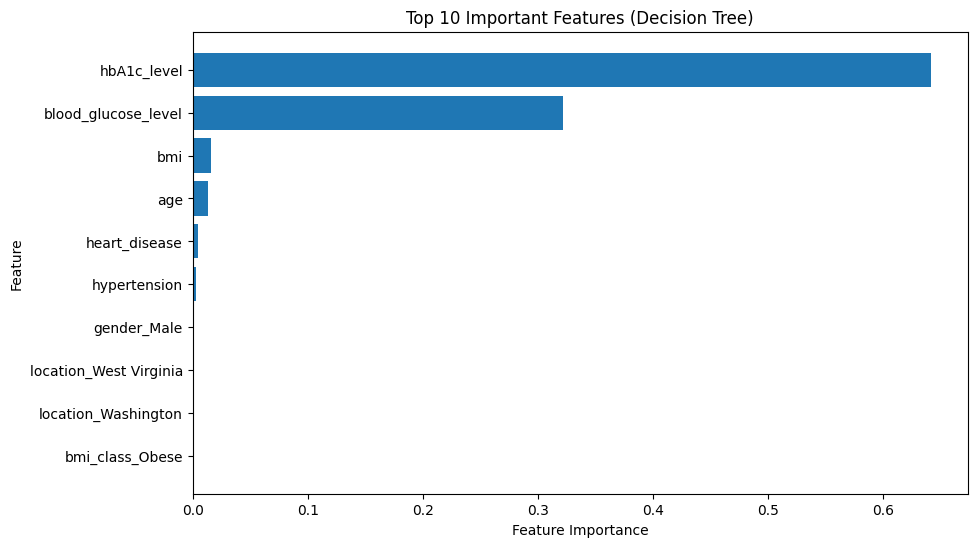

In [100]:
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[indices][:10], dt_importances[indices][:10])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (Decision Tree)")
plt.gca().invert_yaxis()
plt.show()

### **Random Forest**

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
# finetuned_model = RandomForestClassifier(random_state=42)

In [103]:
# params_grid = {
#     "criterion": ["gini"],
#     "n_estimators": [100],
#     "max_depth": [None, 10, 20, 30],
#     "min_samples_split": [2, 5],
#     "min_samples_leaf": [2, 5],
#     "max_features": ["sqrt", "log2", None],
#     "class_weight": [None, "balanced"],
# }

# grid = GridSearchCV(finetuned_model, params_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
# grid.fit(X_train, y_train)

In [104]:
# print("Best parameters:", grid.best_params_)
# print("Best CV score:", grid.best_score_)

We found the best prams is `{'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}`

In [105]:
best_rf_model = RandomForestClassifier(
    class_weight=None,
    criterion='gini',
    max_depth=12,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42,
)

In [106]:
best_rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,12
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [107]:
best_rf_y_pred = best_rf_model.predict(X_test)

Accuracy:  0.9724917475242573
Recall:  0.6829411764705883
Precision:  0.9906143344709898
F1 Score:  0.8084958217270195


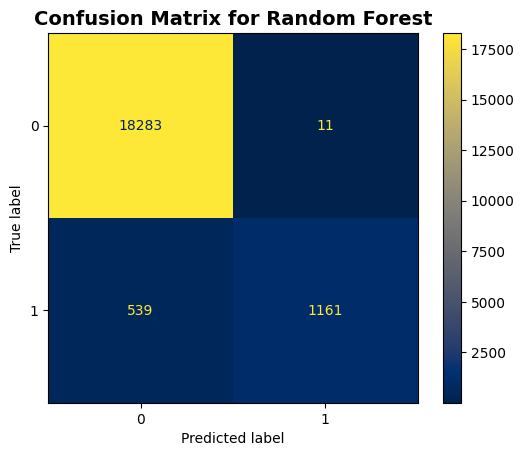

In [108]:
print("Accuracy: ", accuracy_score(y_test, best_rf_y_pred))
print("Recall: ", recall_score(y_test, best_rf_y_pred))
print("Precision: ", precision_score(y_test, best_rf_y_pred))
print("F1 Score: ", f1_score(y_test, best_rf_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, best_rf_y_pred)).plot(cmap=plt.cm.cividis)

plt.title("Confusion Matrix for Random Forest", fontsize=14, weight='bold')
plt.show()

In [109]:
importances = best_rf_model.feature_importances_

In [110]:
indices = importances.argsort()[::-1]
indices

array([ 9, 10,  8,  0,  7,  6, 11,  3, 12,  4,  1,  2,  5, 30, 16, 22, 34,
       56, 40, 27, 55, 20, 45, 25, 60, 42, 32, 58, 64, 23, 48, 53, 36, 65,
       29, 18, 26, 49, 13, 44, 61, 39, 17, 59, 14, 62, 19, 57, 41, 31, 21,
       28, 24, 43, 50, 68, 33, 54, 47, 38, 15, 51, 52, 46, 37, 63, 66, 35,
       67, 69])

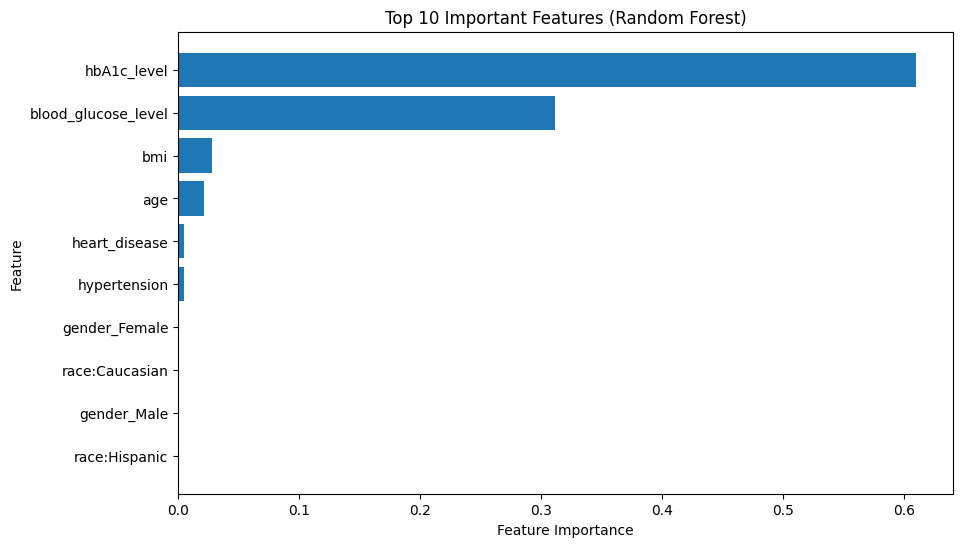

In [111]:
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[indices][:10], importances[indices][:10])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

- The **Random Forest** model delivers the most balanced results across all metrics. It records 18,283 true negatives and the highest number of 1,161 true positives, with only 11 false positives and 539 false negatives. 
- This demonstrates that Random Forest effectively minimizes both types of errors, making it the most robust model for predicting diabetes in this study.

## **Findings \& Future Works**

**Achievements:**

| Model               | Accuracy | Recall  | Precision | F1 Score |
|---------------------|----------|---------|-----------|----------|
| Logistic Regression | 0.9609   | 0.6188  | 0.8870    | 0.7290   |
| SVM                 | 0.9690   | 0.6547  | 0.9712    | 0.7822   |
| Decision Tree       | <u>0.9722</u>   | <u>0.6735</u>  | **1.0000**| <u>0.8049</u>   |
| Random Forest       | **0.9725**| **0.6829** | <u>0.9906</u>    | **0.8085** |

- All models (Logistic Regression, SVM, Decision Tree, Random Forest) achieved high accuracy above 96%.
- Precision values are consistently high (above 0.88), with Decision Tree and Random Forest reaching nearly perfect scores, indicating strong ability to reduce false positives.
- Decision Tree and Random Forest obtained the highest F1 Scores (~0.80), showing a better balance between Precision and Recall.

**Limitations and future improvements:**

- Recall remains relatively low (around 0.61–0.68), meaning many true diabetes cases are still being missed.
- Apply data balancing techniques such as SMOTE, oversampling, or class weighting to improve recall.
- Experiment with more advanced models like XGBoost, LightGBM, CatBoost, or even neural networks.
- Finetuning hyperparameters more carefully, or using other finetuned methods: Optuna (Bayesian Search), Random Search, etc.

**Insights from the data**

- The dataset is imbalanced between diabetic and non-diabetic cases, which explains why recall remains low despite high accuracy.
- Top 6 important features: `hbA1c_level`, `blood_glucose_level`, `bmi`, `age`, `heart_disease`, `hypertension`; and others less important, even 0 importance => We can remove more columns.